In [1]:
from analyzer import BackTester
from strategies import MACD_Simple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\n.dodonov\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


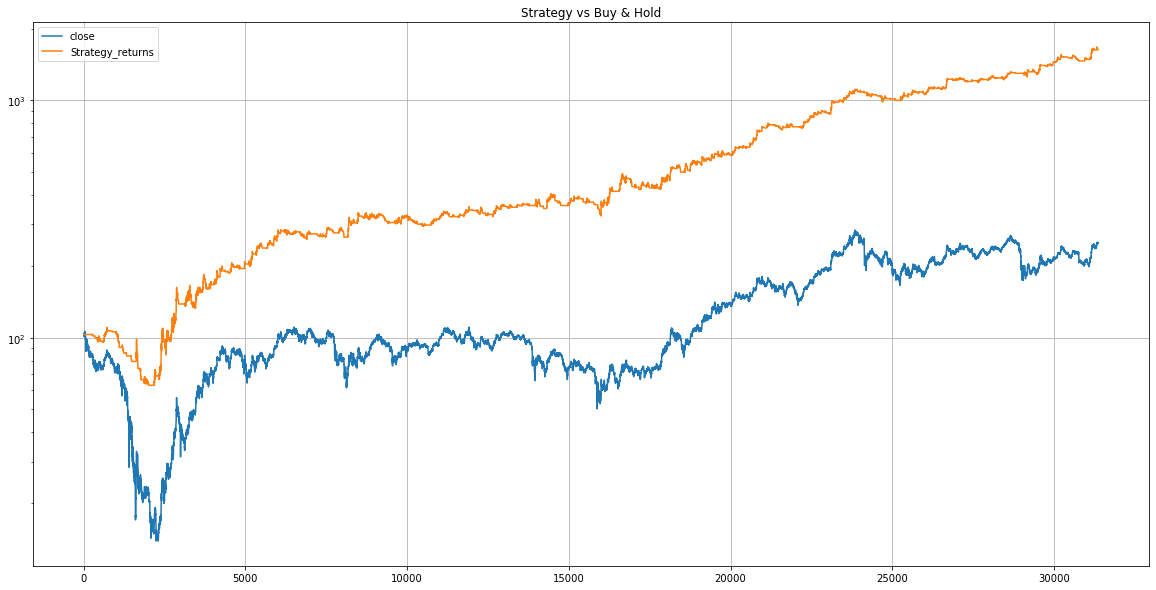

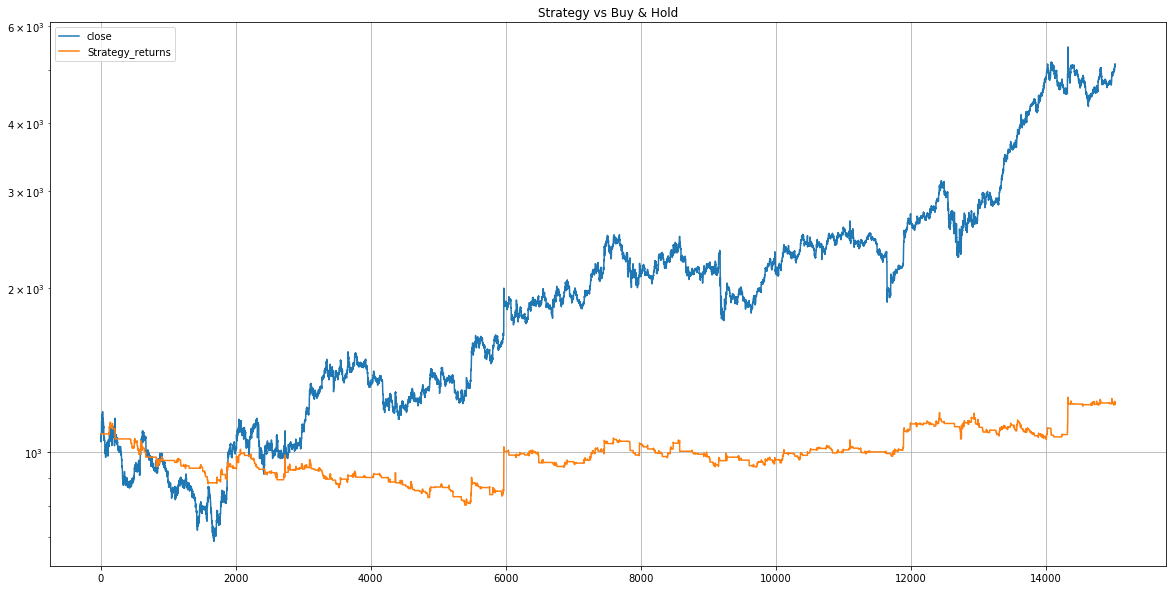

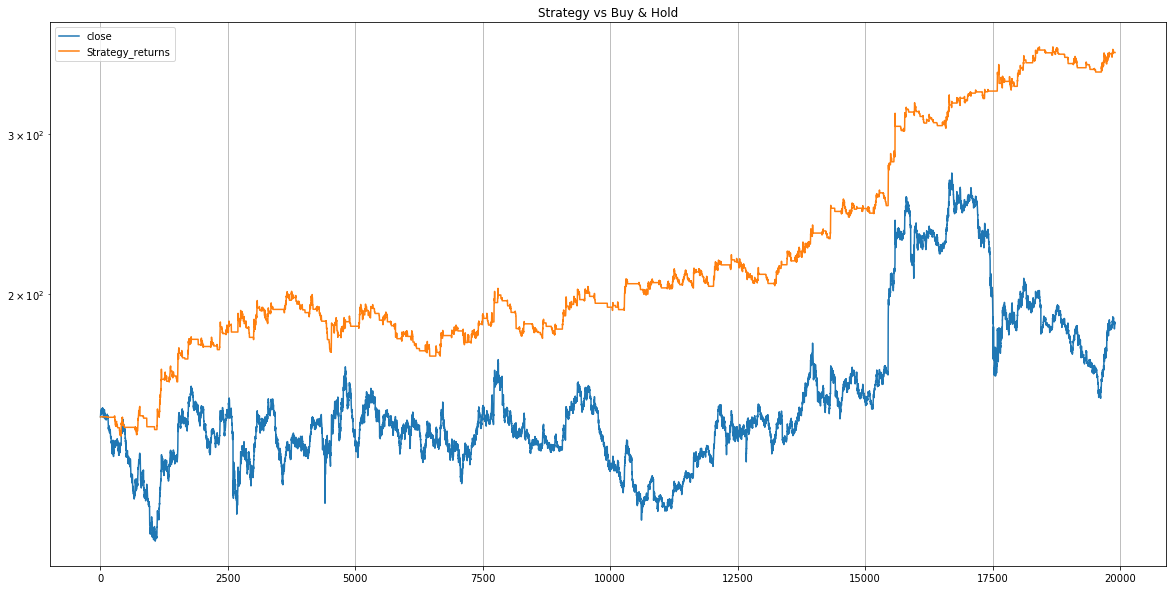

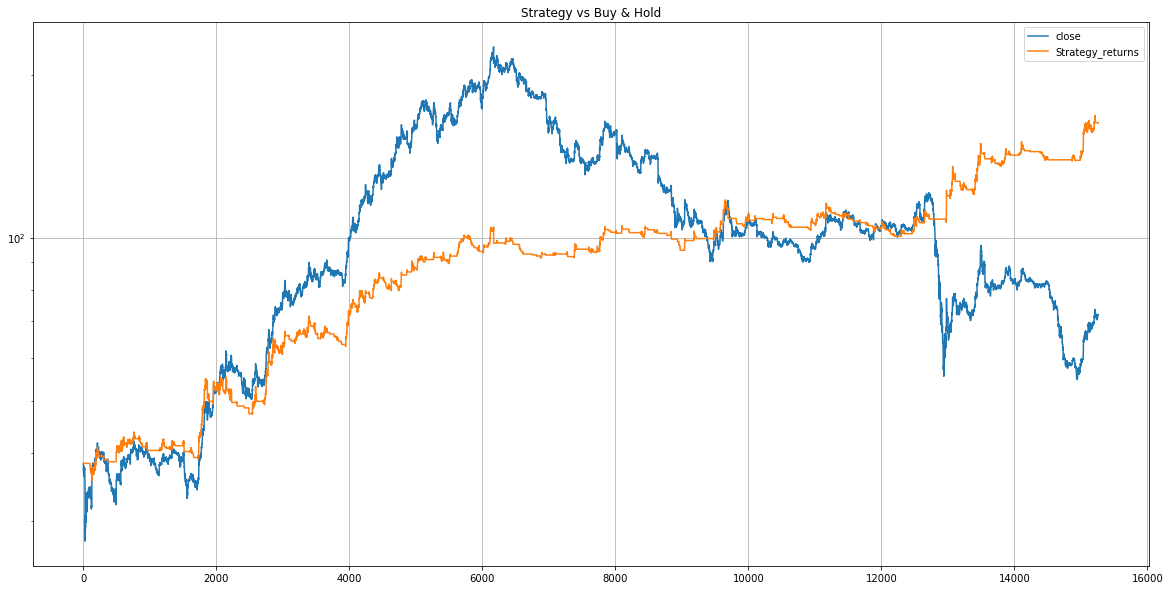

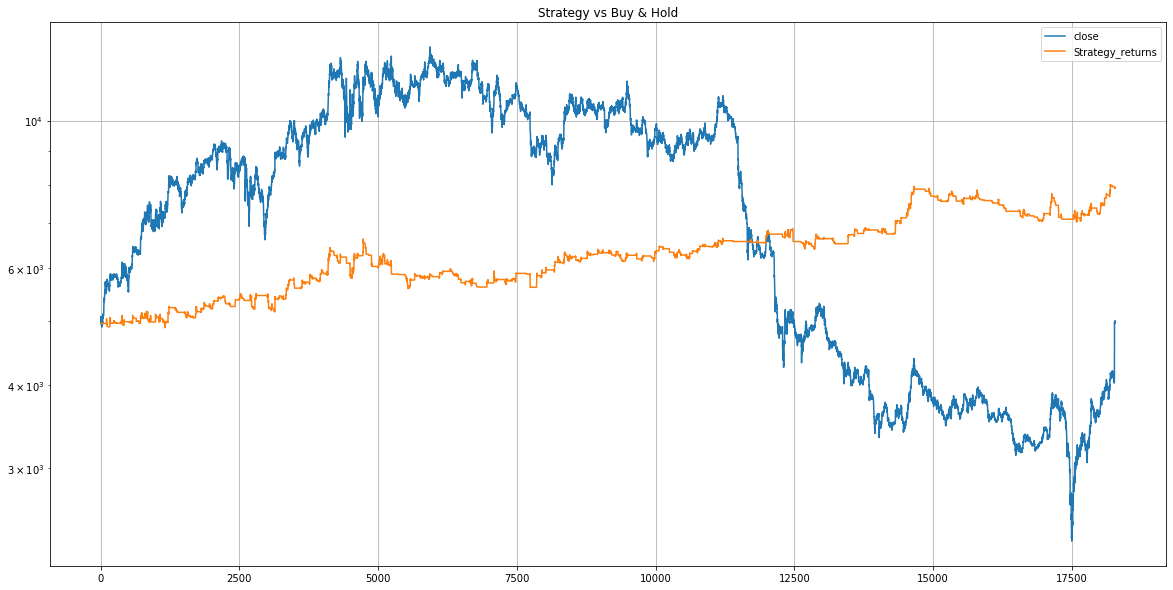

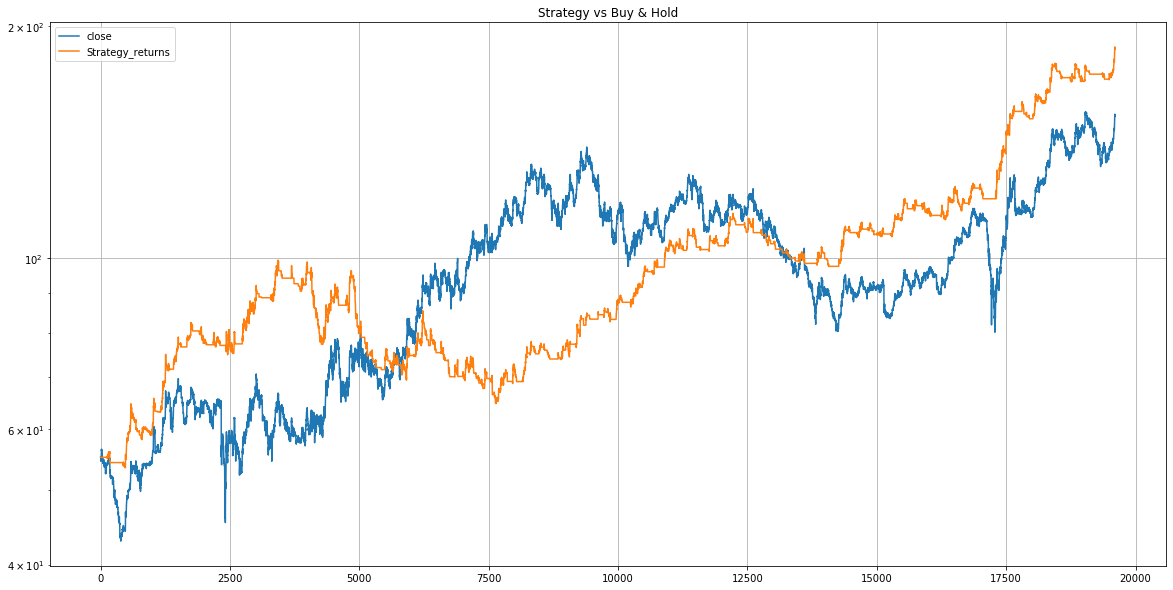

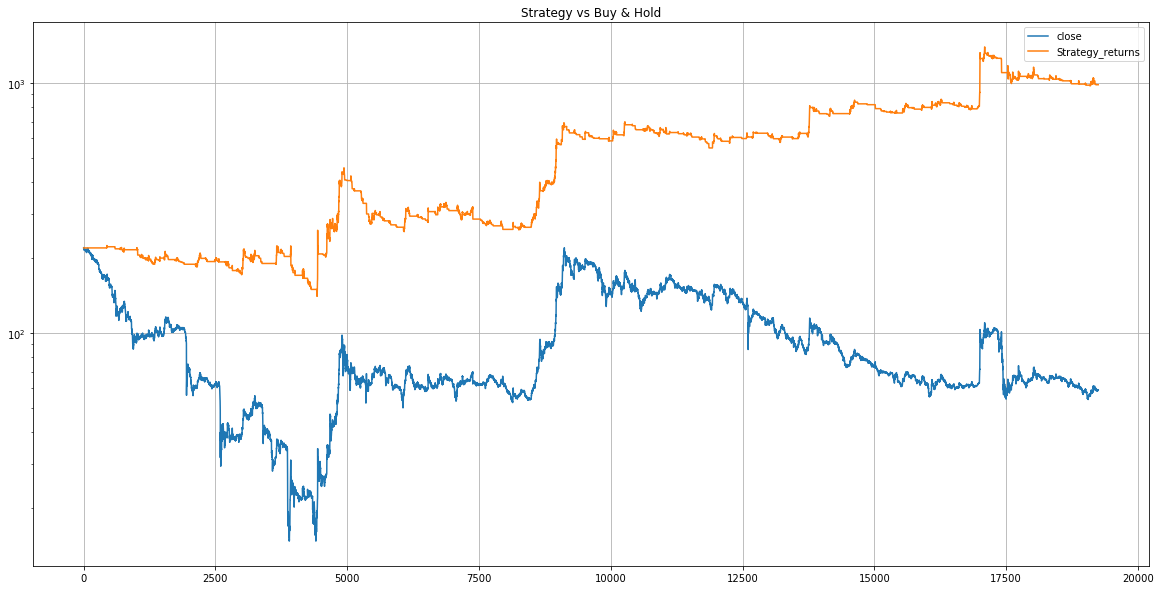

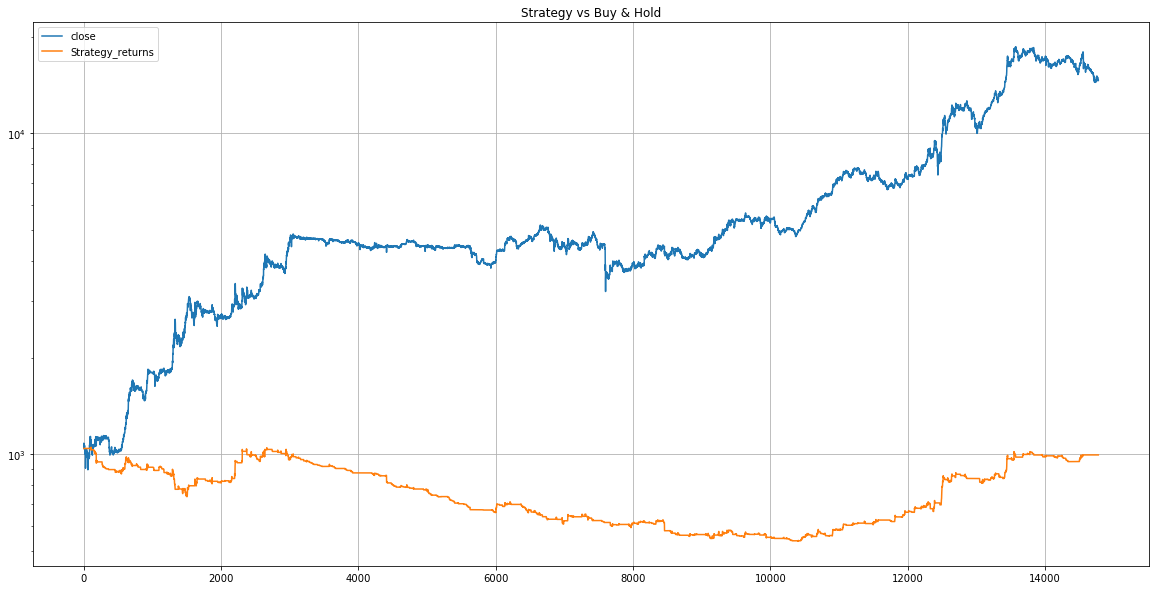

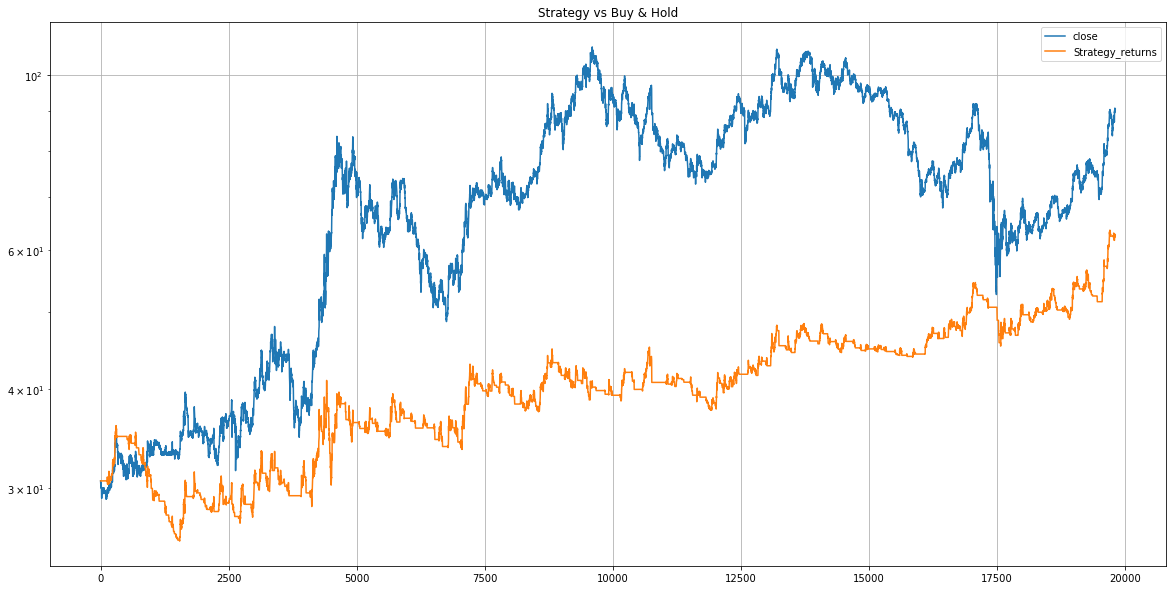

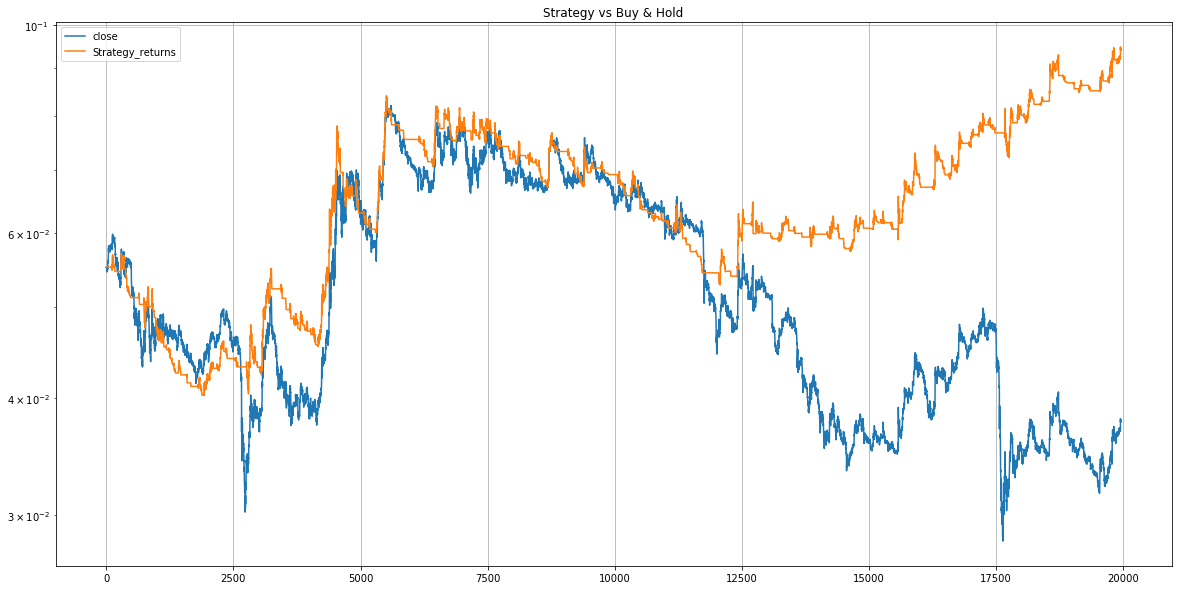

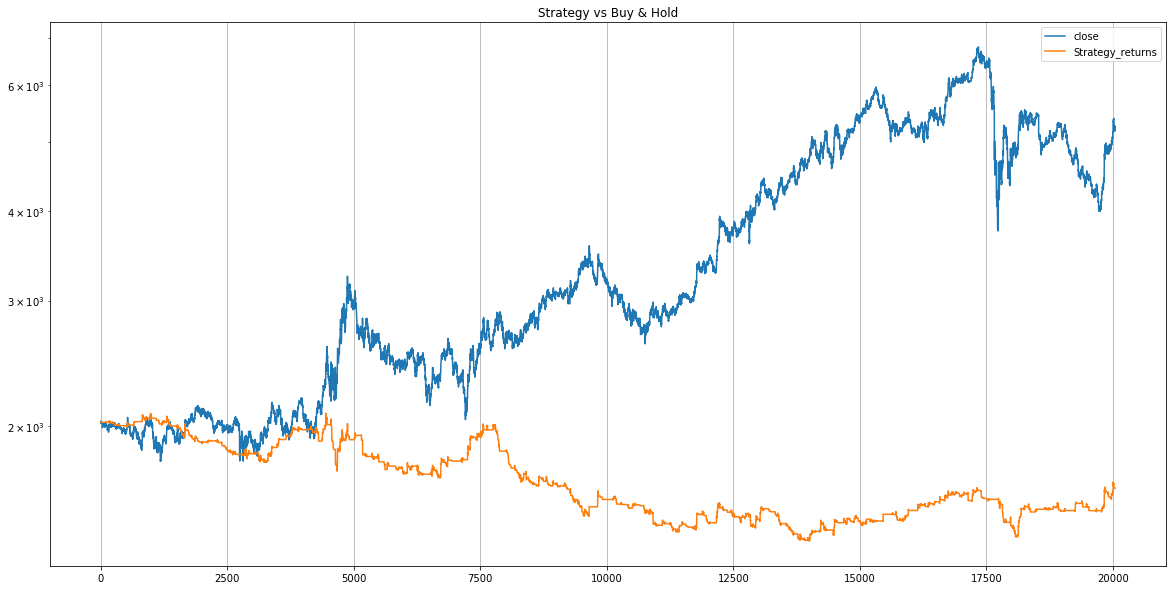

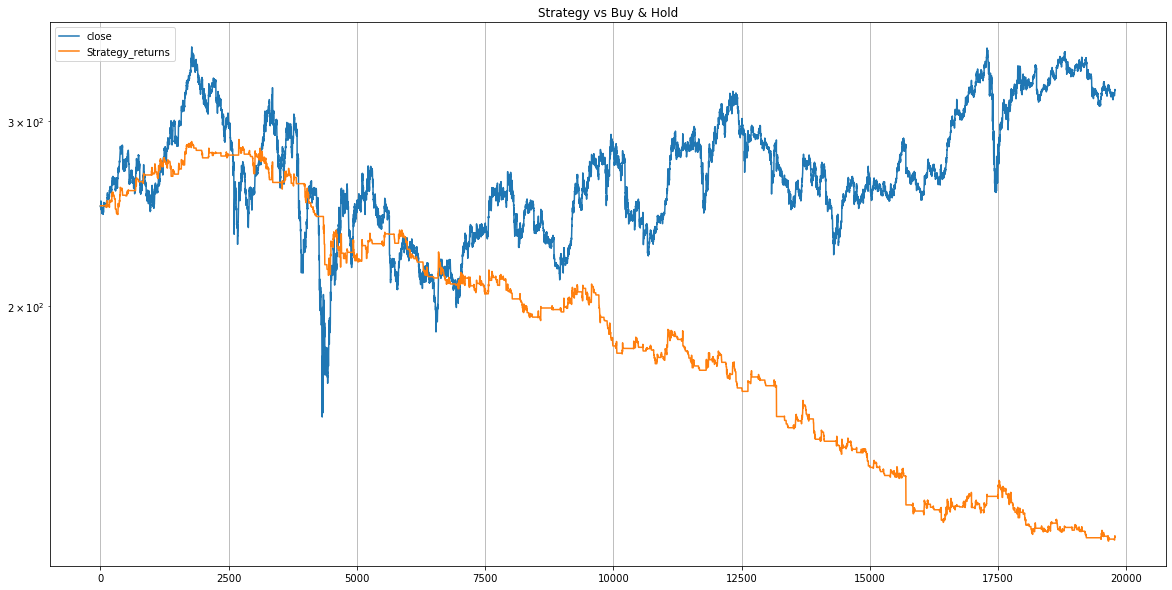

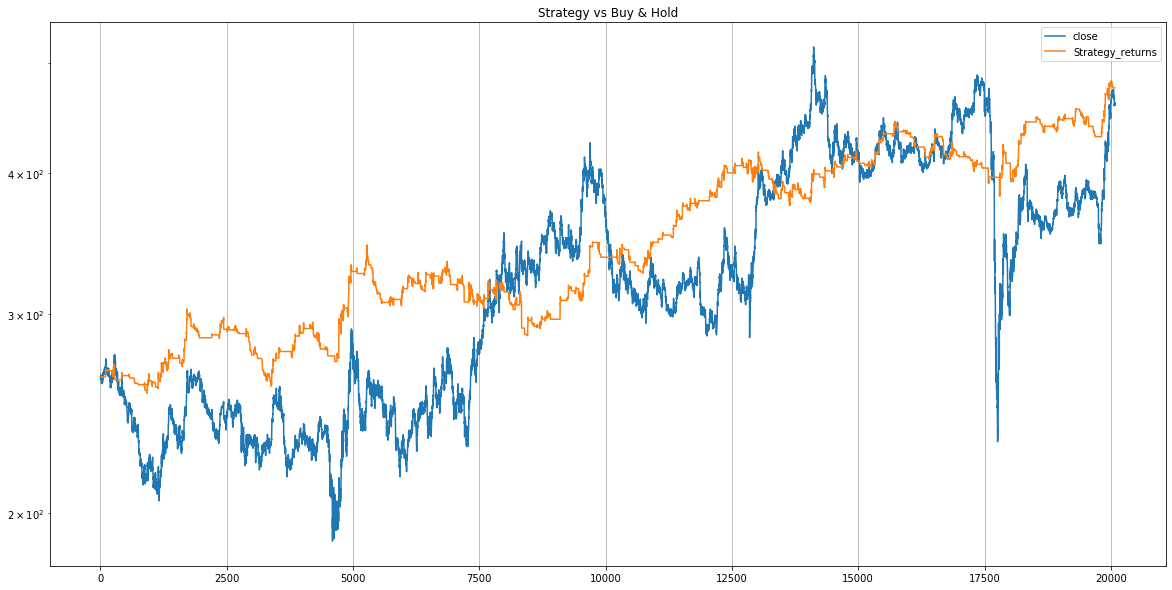

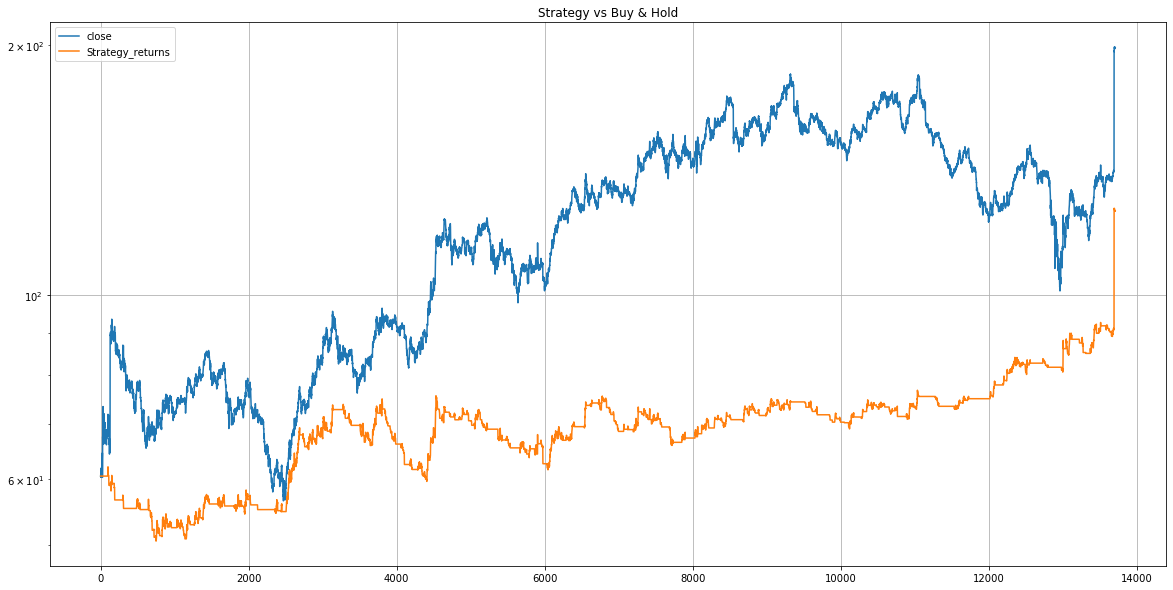

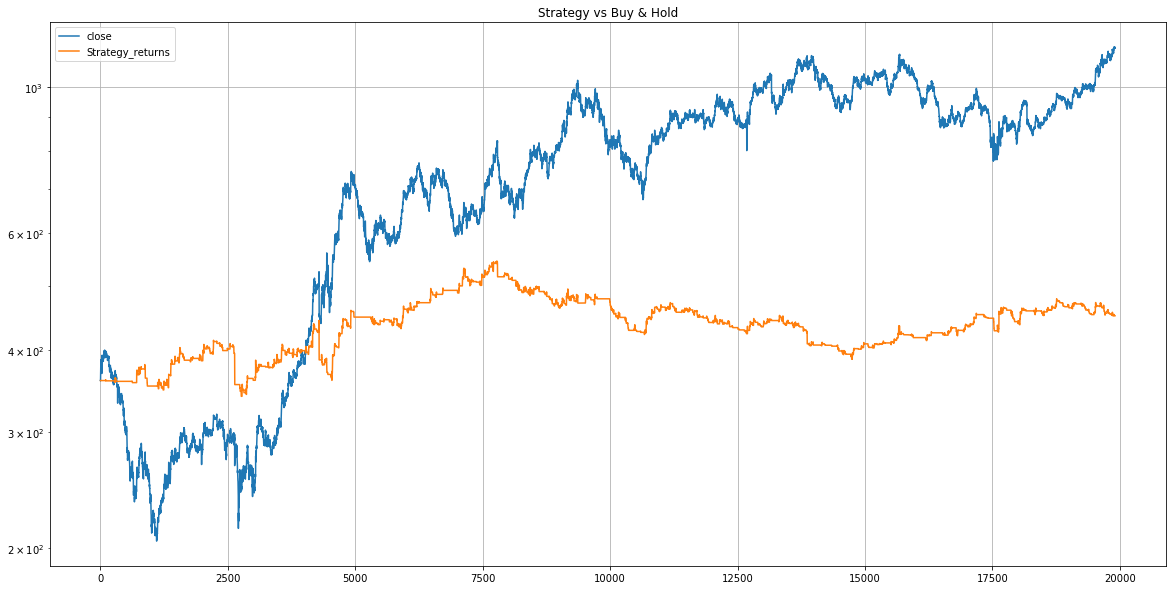

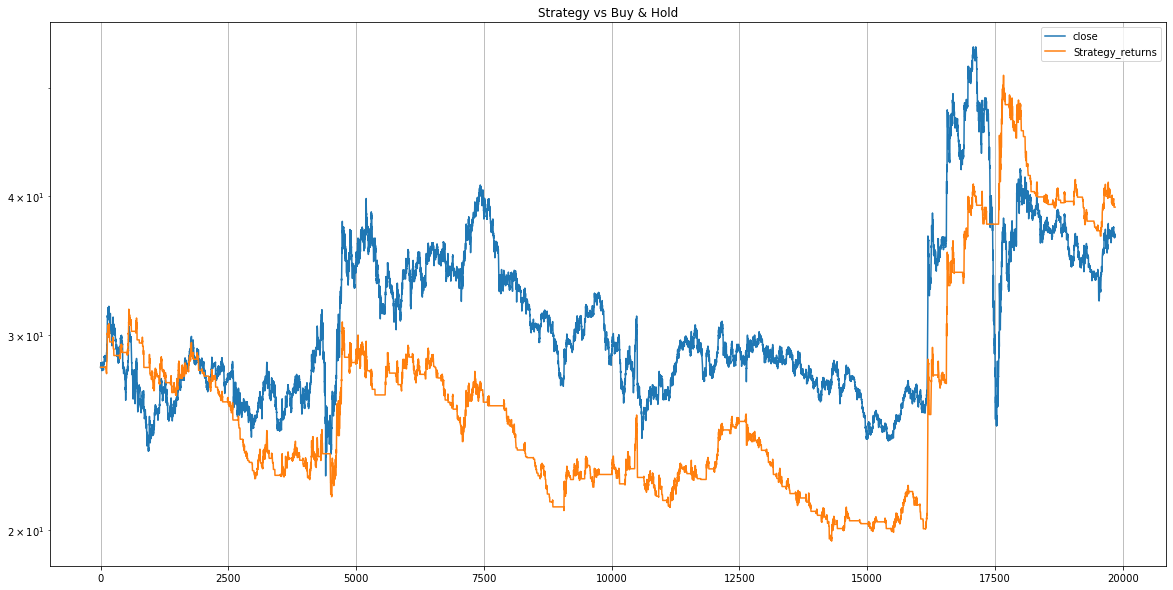

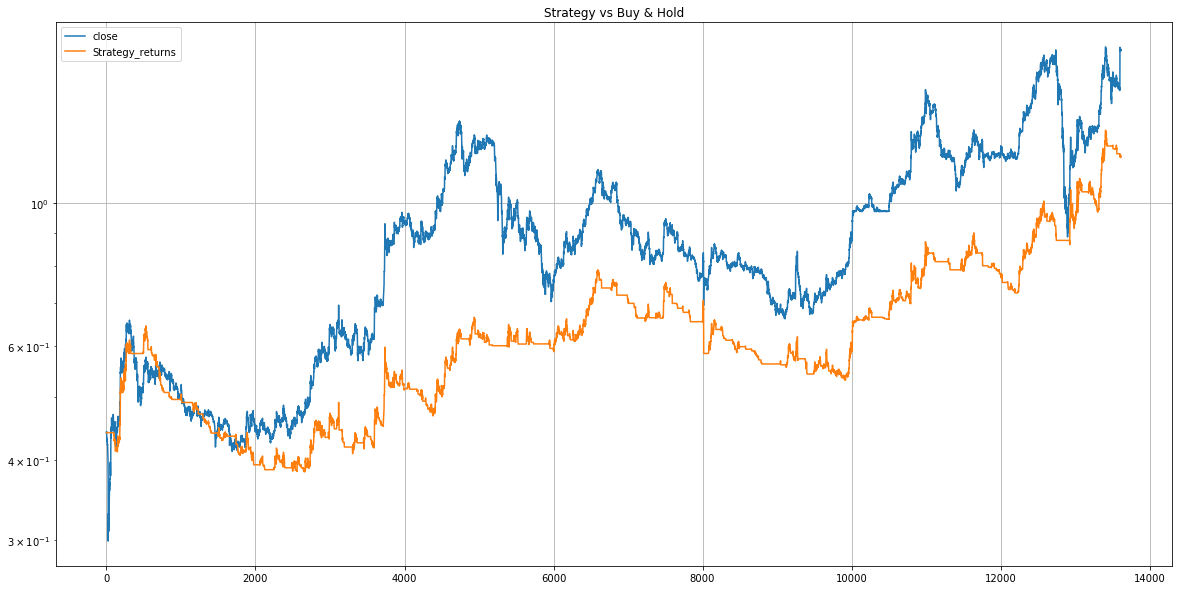

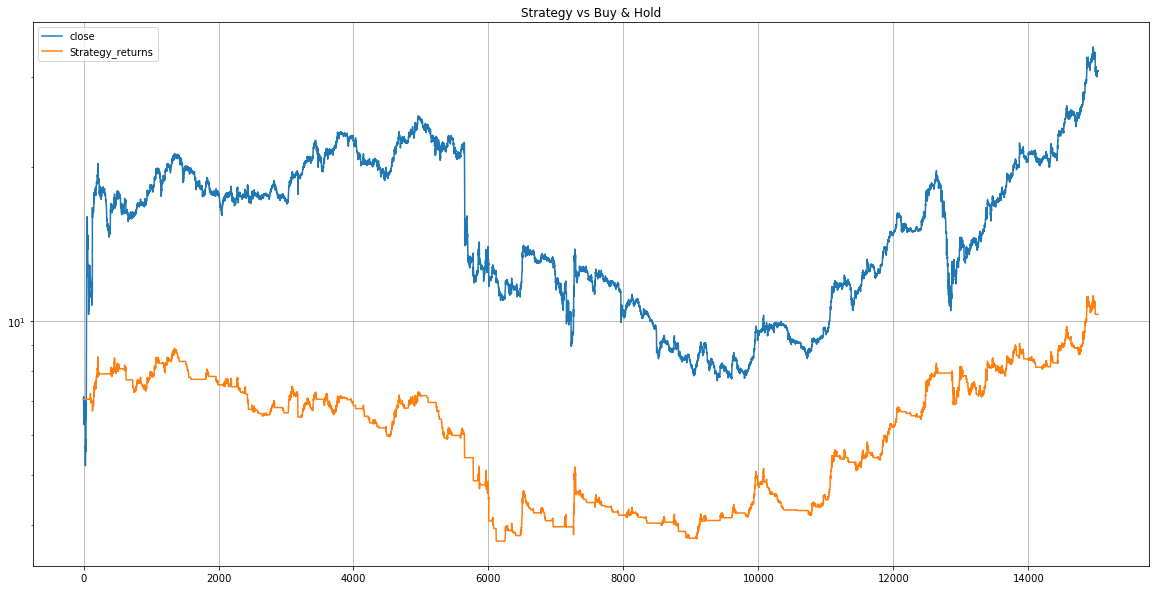

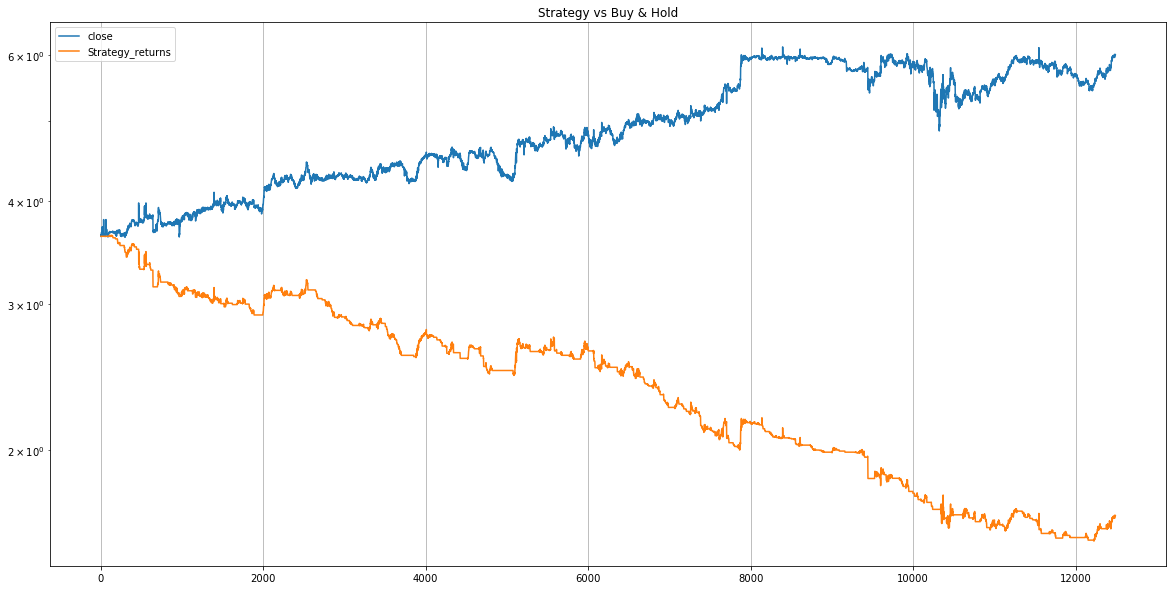

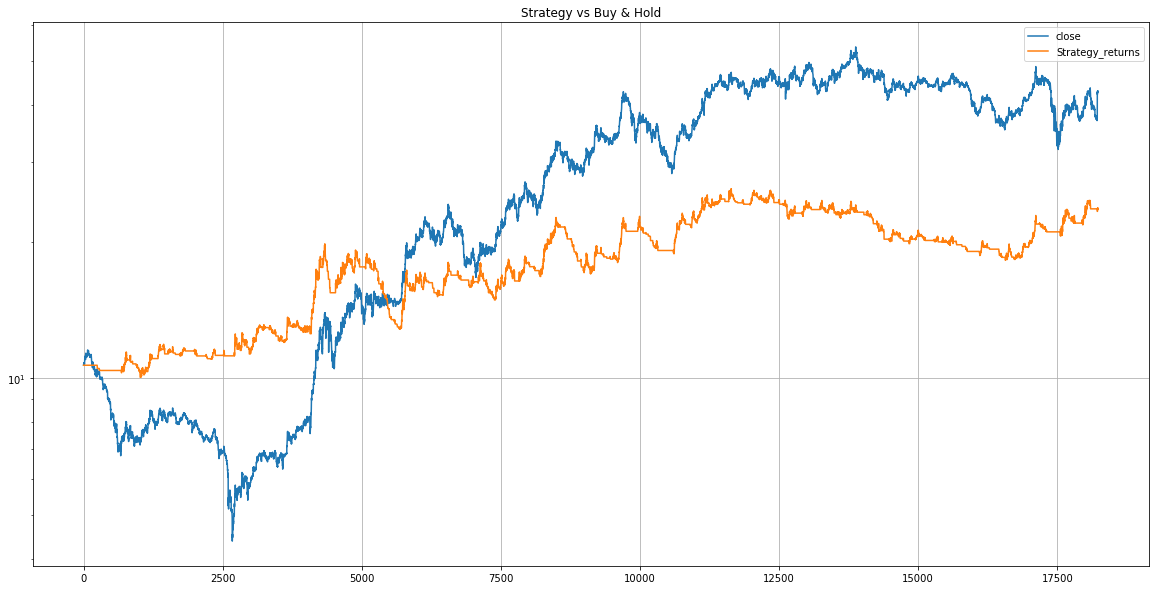

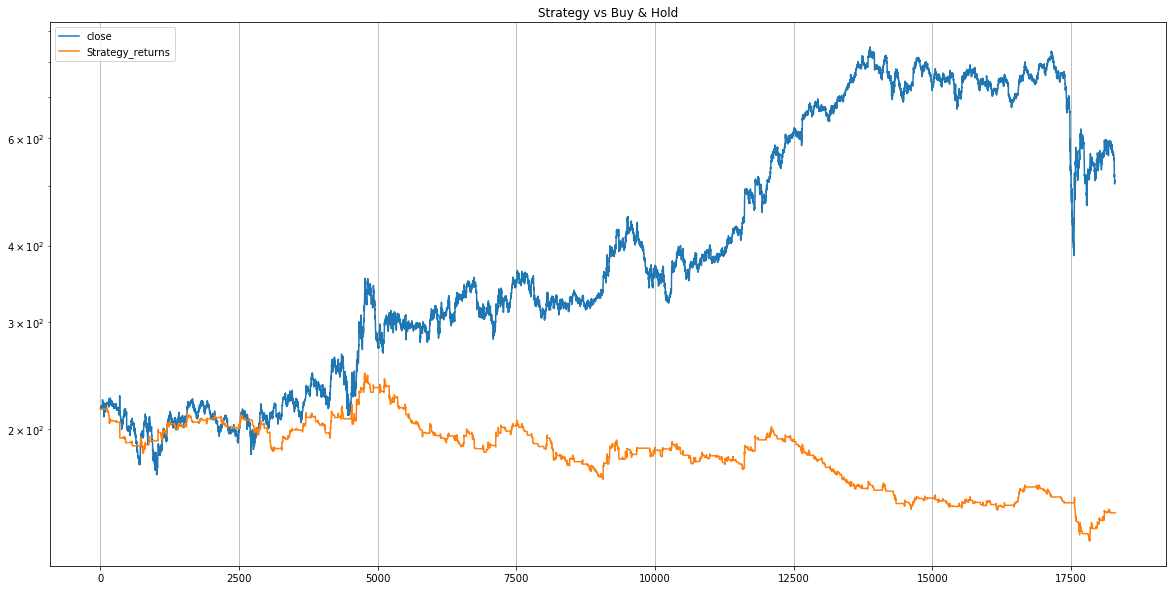

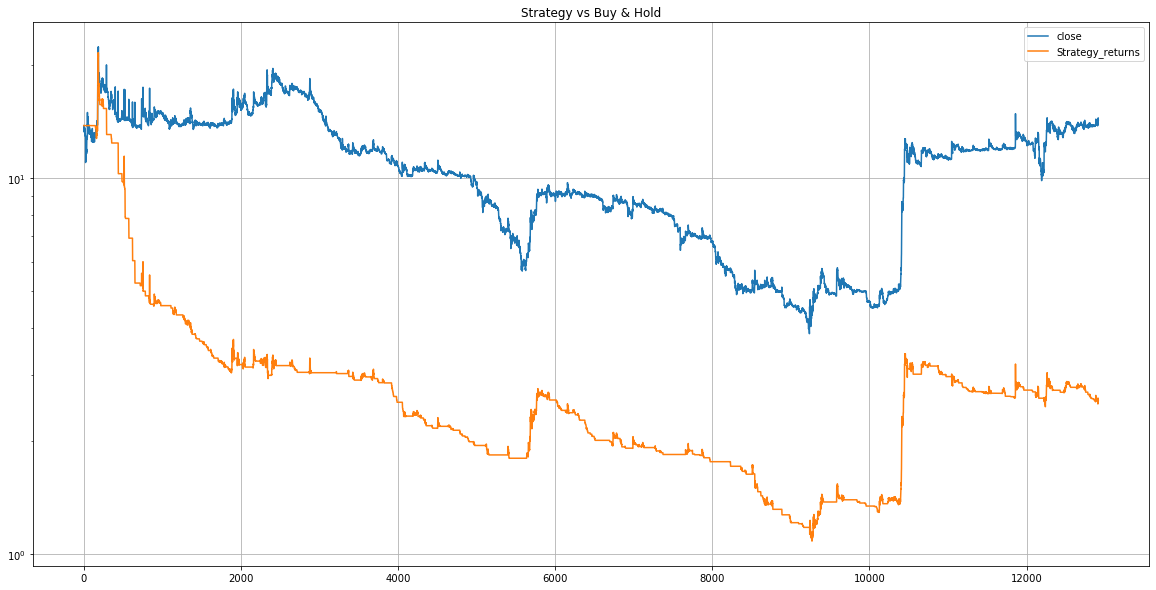

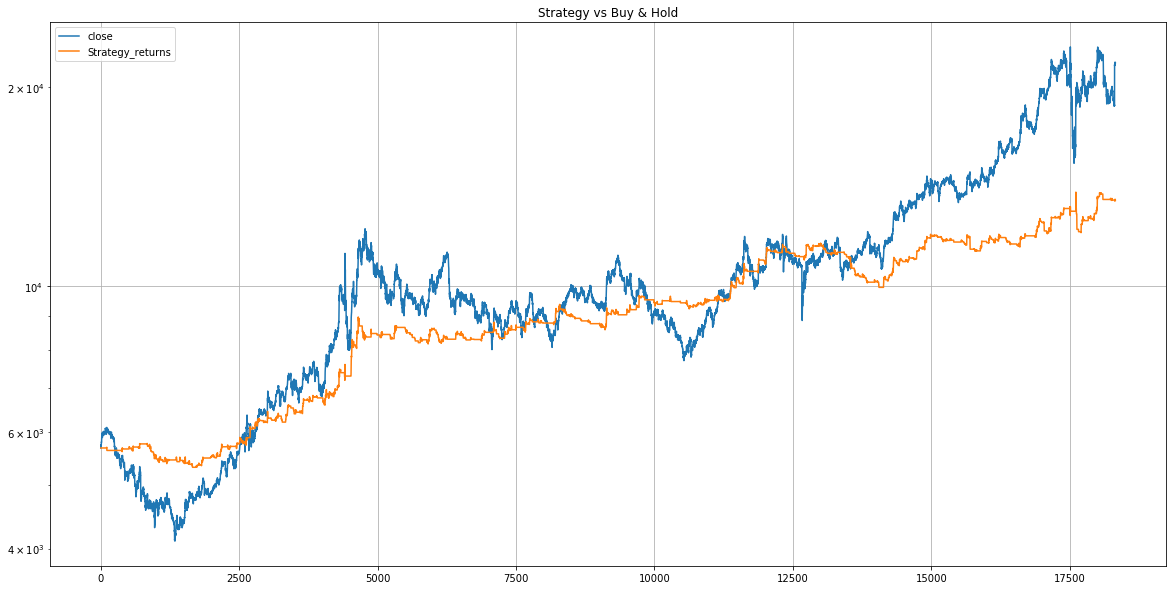

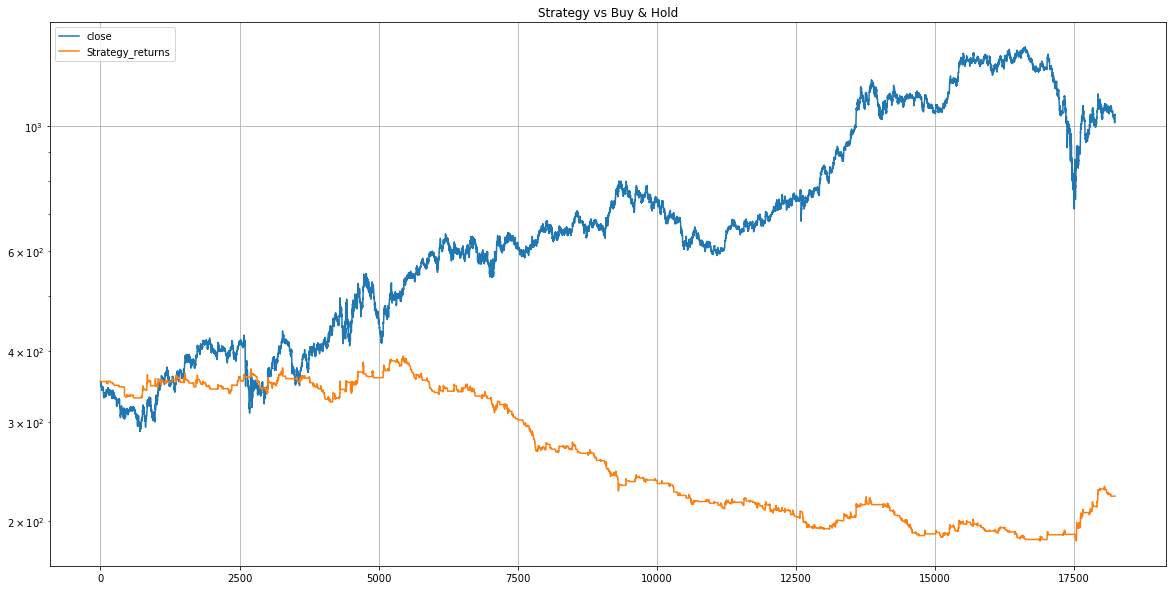

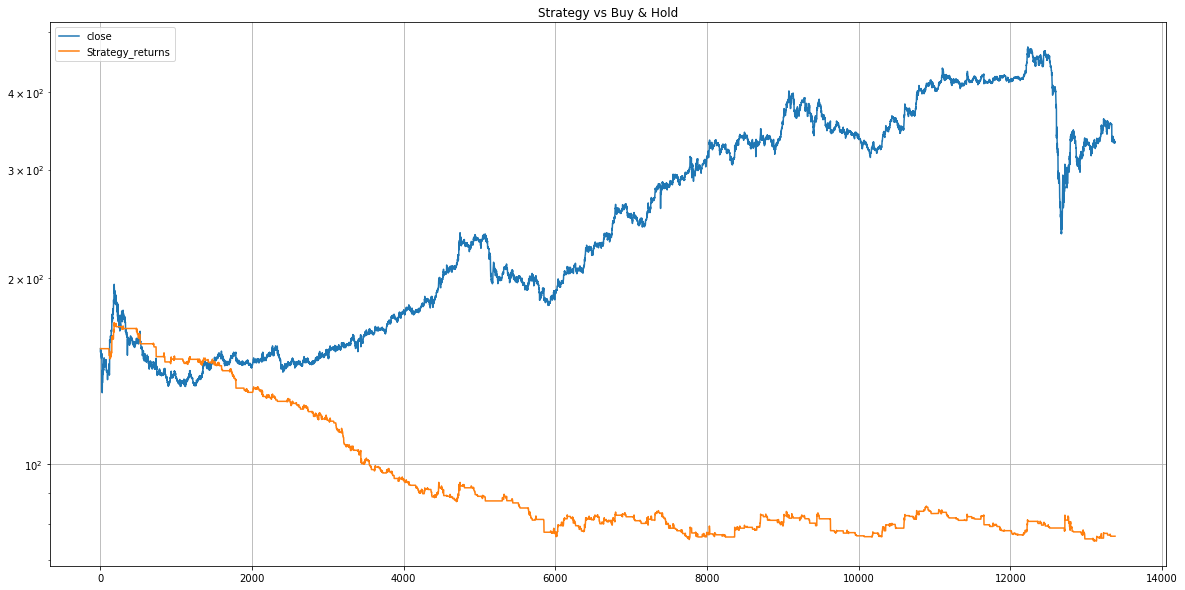

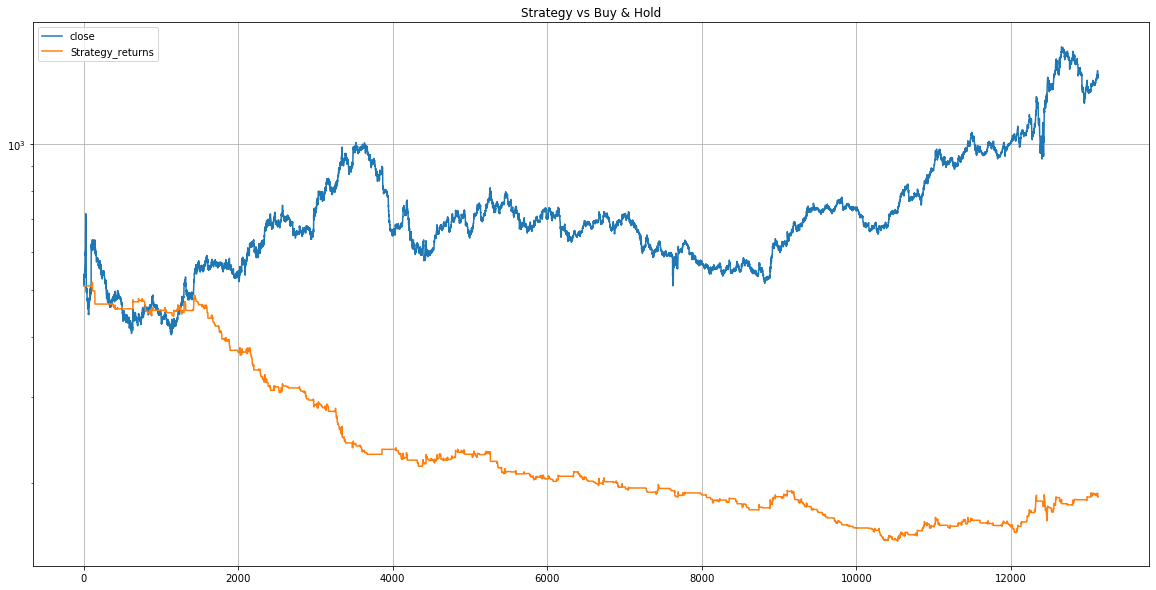

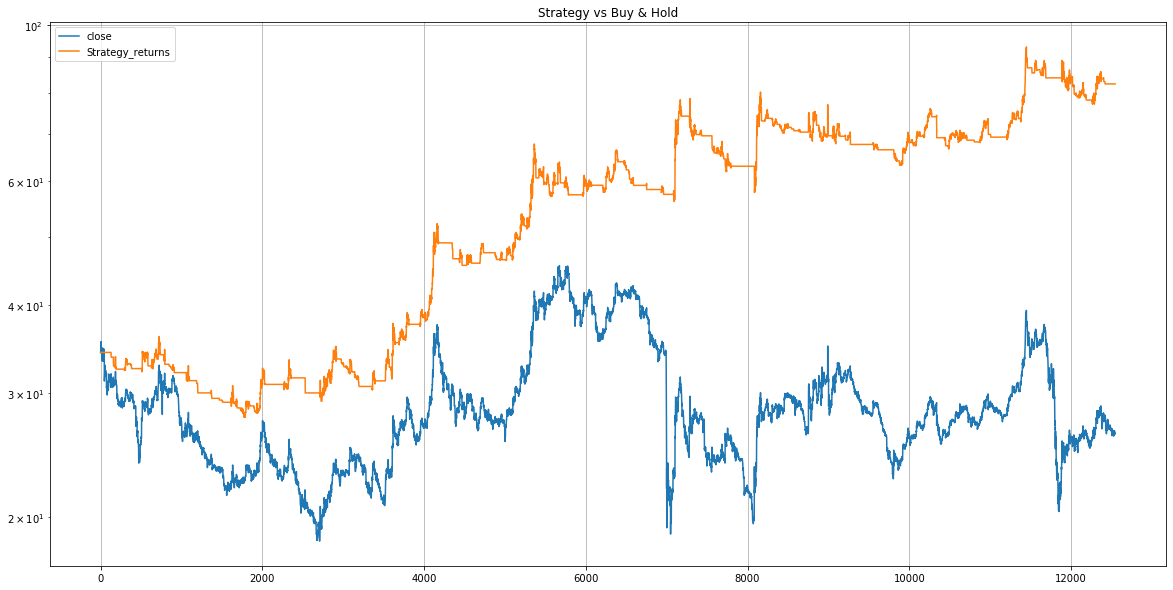

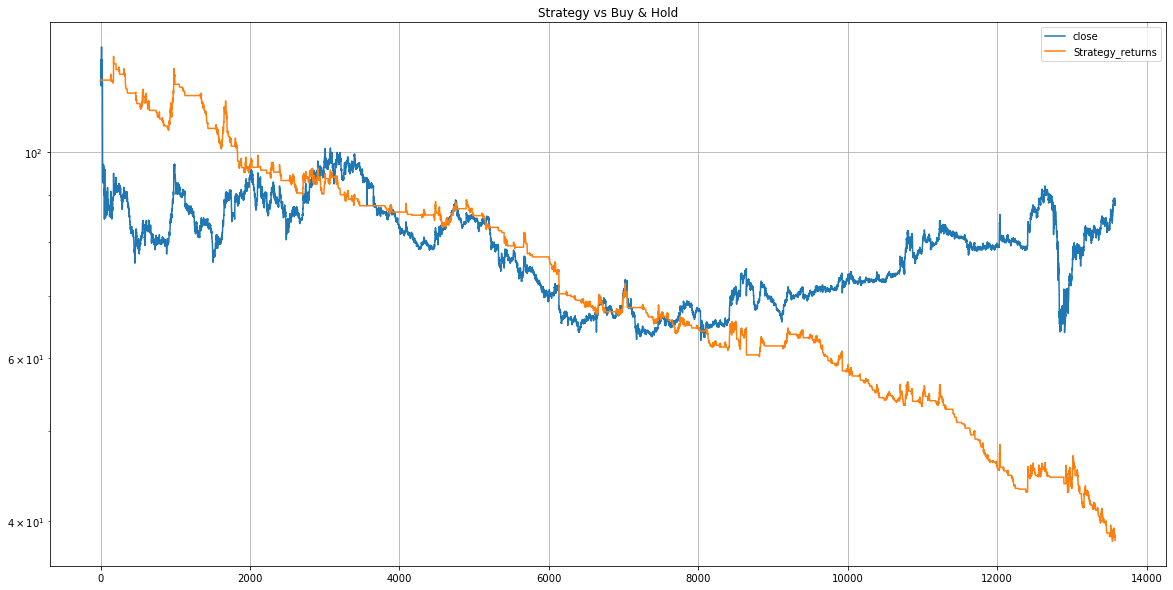

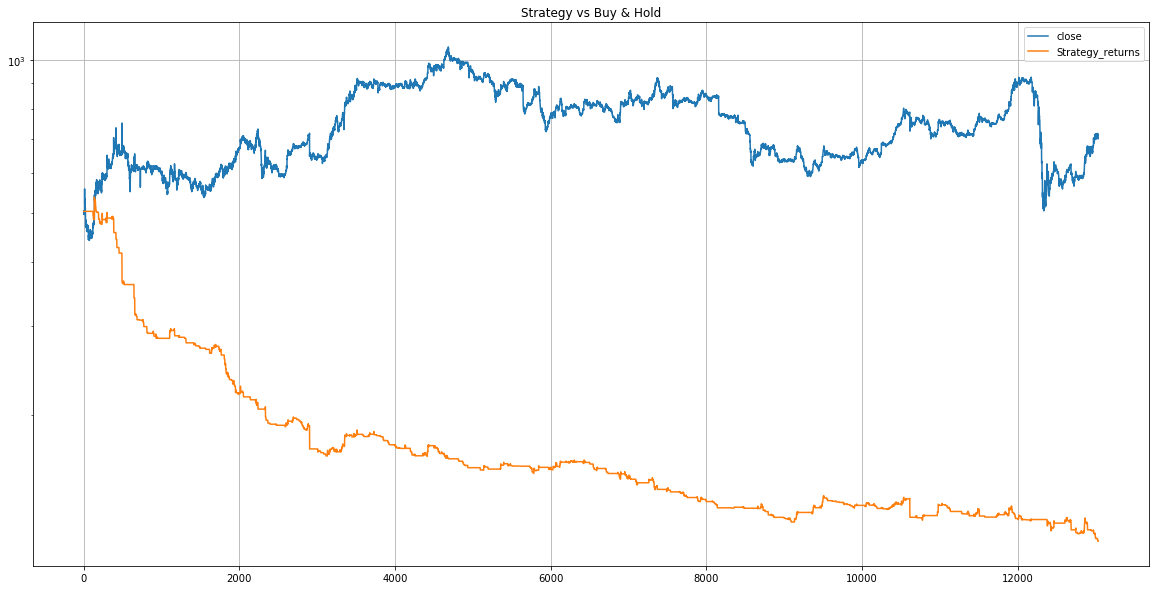

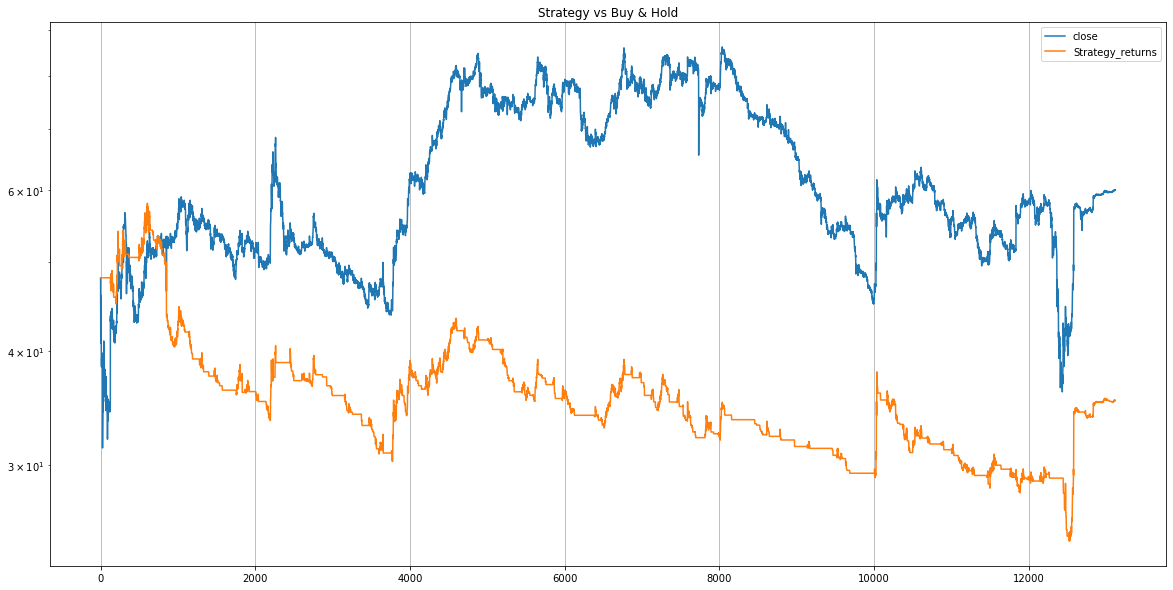

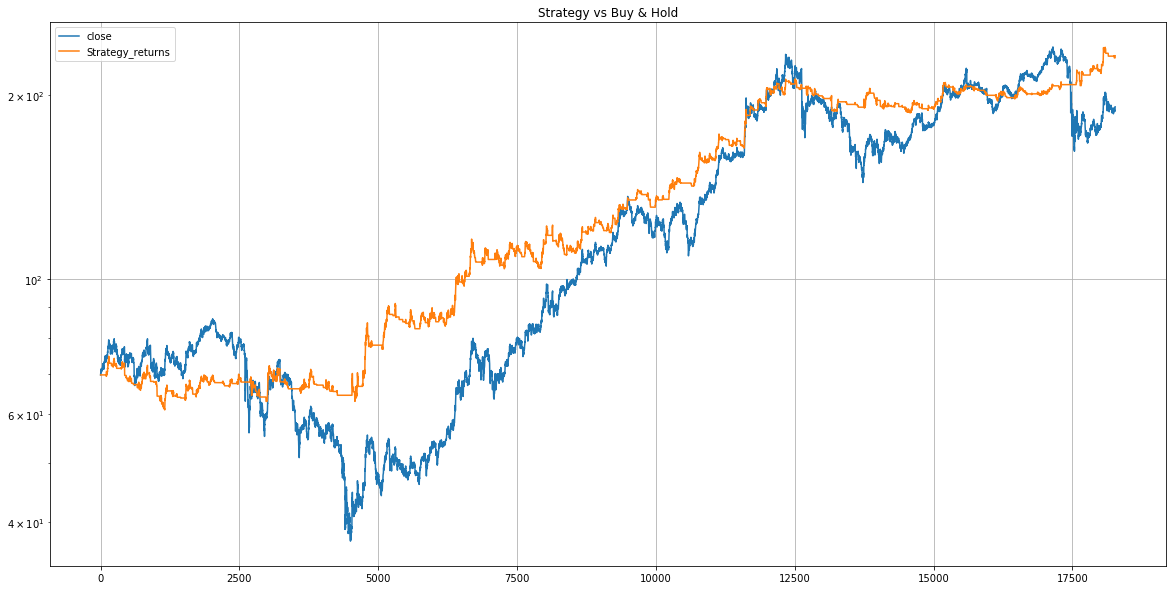

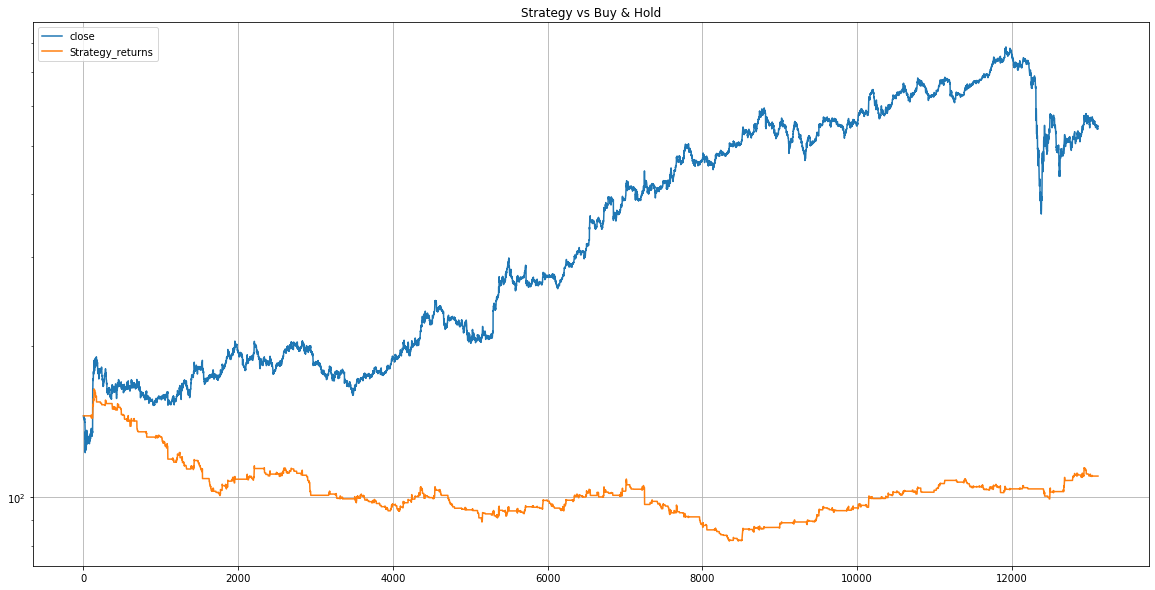

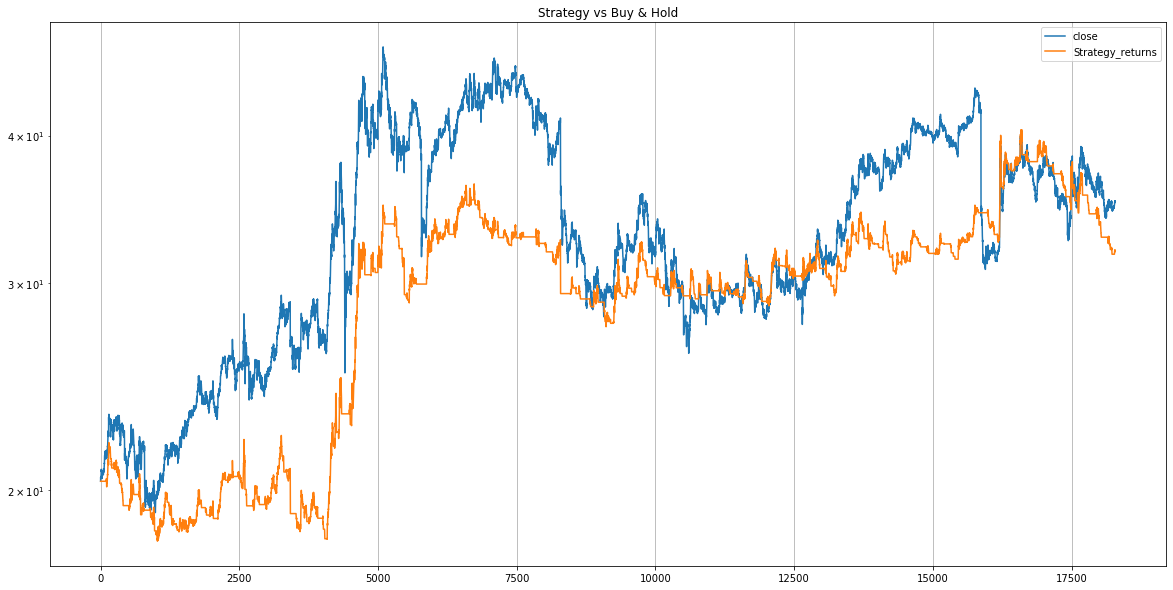

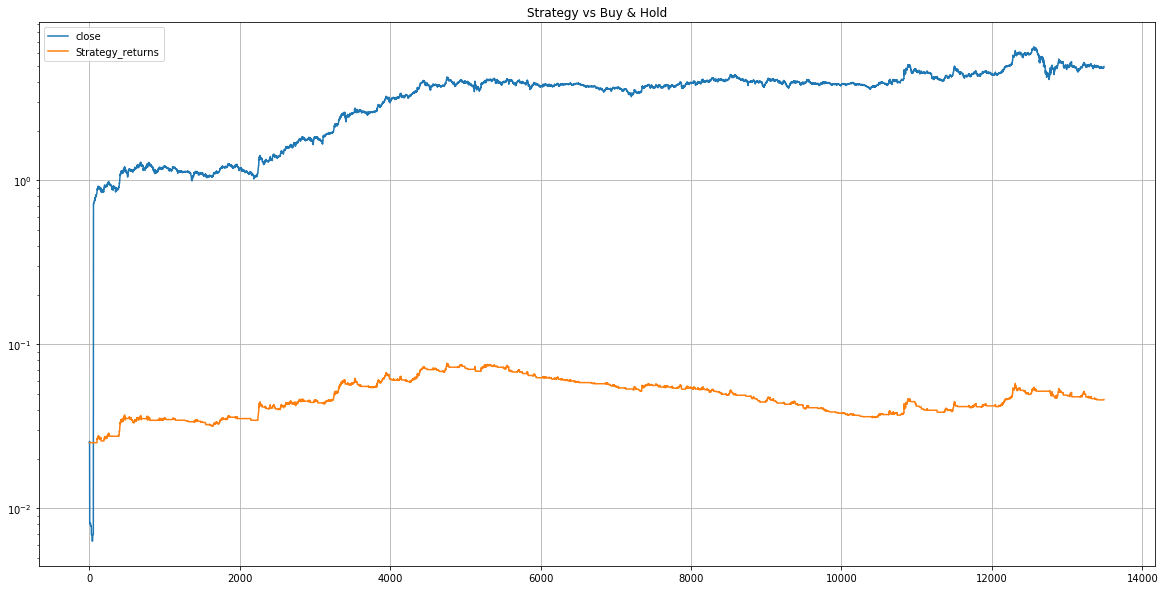

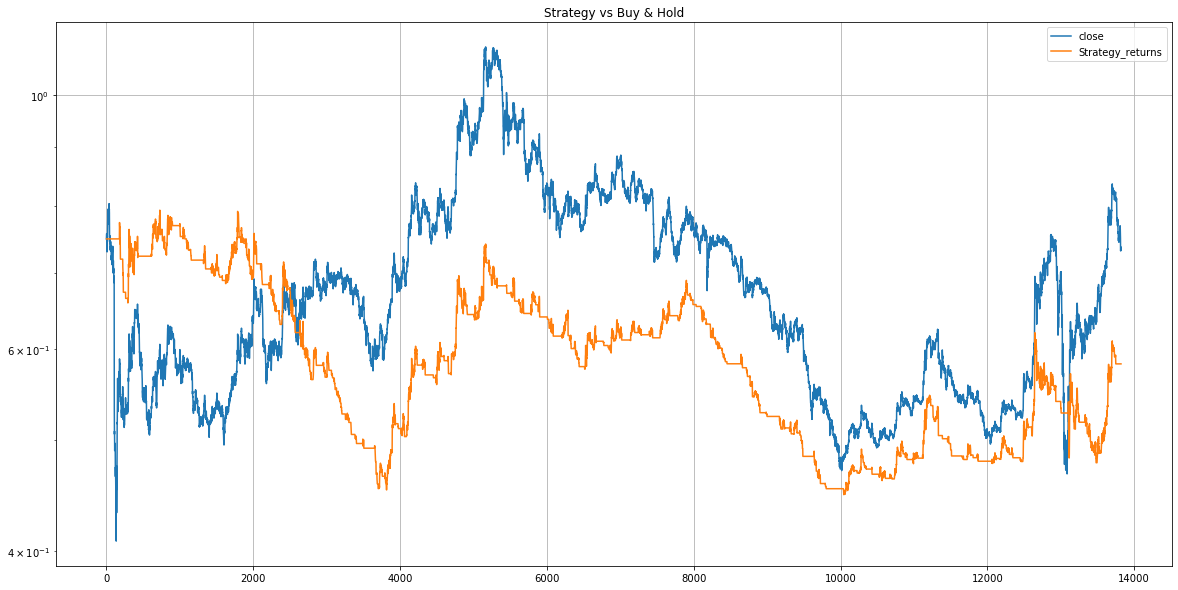

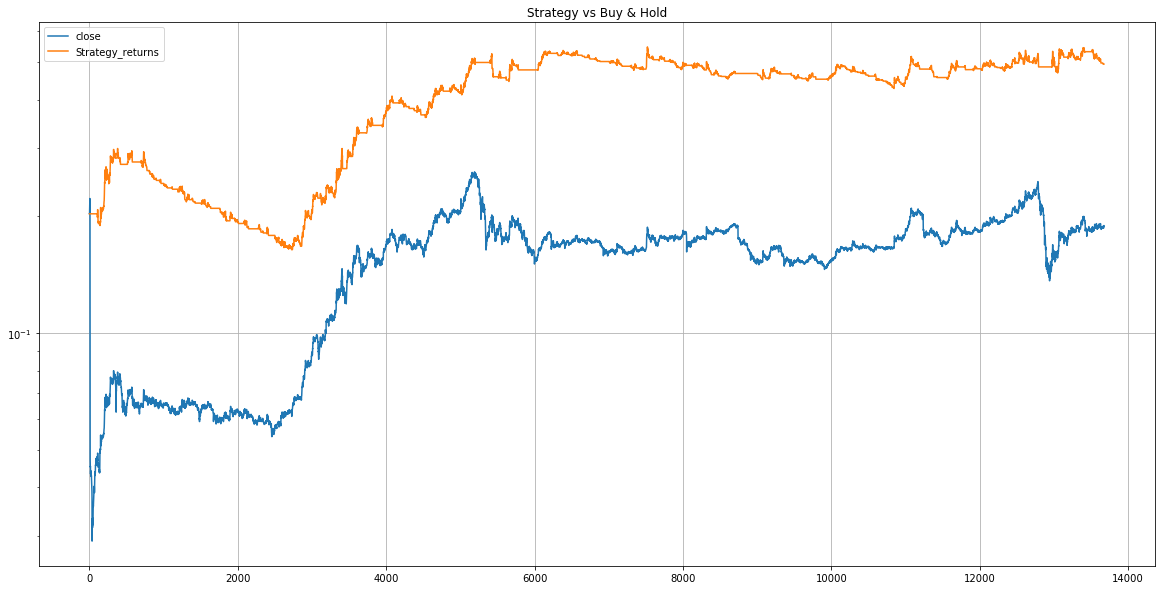

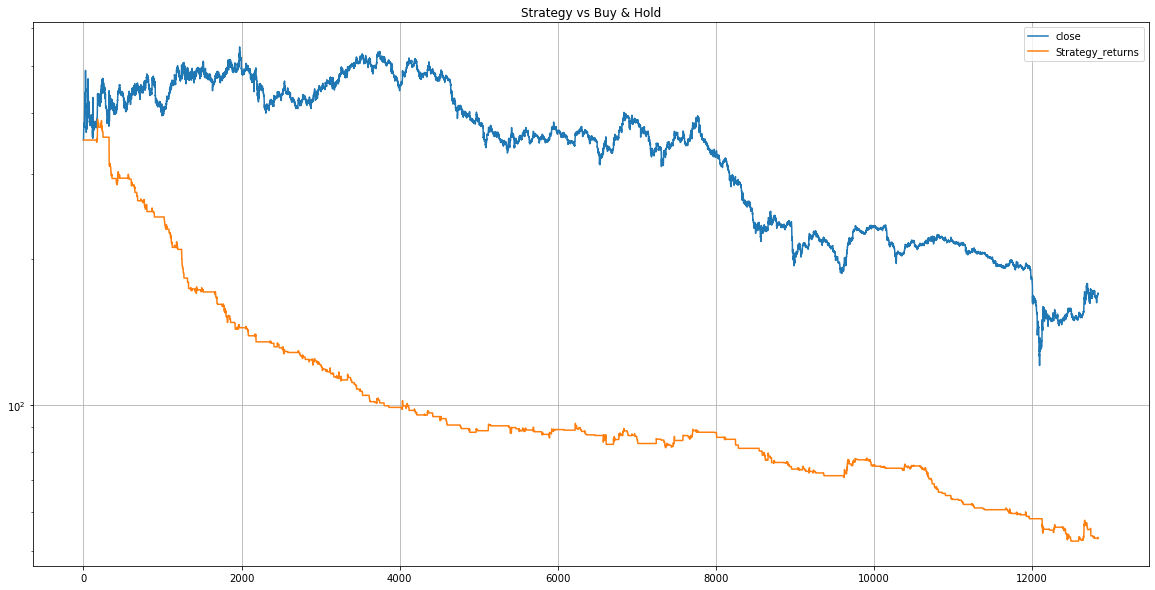

In [12]:
tester = BackTester(take_profit = 10, stop_loss = 1)

for ticker in pd.read_csv('approved_tickers.csv').tickers.to_list():

    stock_data = BackTester.get_frame(ticker, simple = True, time_frame = '1h')
    stock_data = MACD_Simple.get_strategy_frame(stock_data)

    result = tester.test_strategy(stock_data)
    BackTester.visualize(result)

In [7]:
def evaluate_strategy(frame):
    #required columns [close, ret]
    
    def get_data(df, year = None):
        
        if year is not None:
            df = df[df.time.dt.year == year].copy()
            
        return dict(
            strategy_net_income = df.Strategy_returns.iloc[-1] / df.Strategy_returns.iloc[0] -1,
            sharpe_ratio = (df.ret.mean() / df.ret.std())*np.sqrt(len(df)),
            std = df.close.std(),
            max_drop_down = (df.Strategy_returns.min() / df.Strategy_returns.iloc[0]) - 1,
            asset_net_income = df.close.iloc[-1] / df.close.iloc[0] - 1,
            asset_peak = df.close.max() / df.close.iloc[0] -1,
            asset_min = df.close.min() / df.close.iloc[0] -1
        )
       
    frame = frame.iloc[1:]
    total_result = get_data(df = frame)
    
    year_list = frame.time.dt.year.unique()

    compare_list = list(map(lambda year:get_data(df = frame, year = year),year_list))
    
    return pd.DataFrame(compare_list , index = year_list)

temp = evaluate_strategy(result)
temp

,strategy_net_income,sharpe_ratio,std,max_drop_down,asset_net_income,asset_peak,asset_min
2013,0.197021,-0.118215,11.941593,-0.047833,-0.053030,0.079853,-0.270816
2014,-0.014177,-0.012352,7.466414,-0.014177,-0.052911,0.115924,-0.168617
2015,0.063689,0.295528,6.552877,-0.011442,0.053410,0.286400,0.000000
2016,0.079908,0.666654,8.183193,-0.043474,0.137317,0.245566,-0.090441
2017,0.027796,-0.840580,10.290154,-0.033257,-0.155121,0.026026,-0.270555
2018,0.206819,0.803519,8.081516,0.000000,0.171487,0.346867,-0.003282
2019,0.336368,2.036737,38.975483,-0.016483,0.663531,0.762733,-0.030948
2020,0.116983,-0.853649,22.382223,-0.005990,-0.282738,0.009916,-0.408018


In [112]:
temp

,strategy_net_income,sharpe_ratio,std,max_drop_down,asset_net_income,asset_peak,asset_min
2012,0.000000,0.639634,0.645621,0.000000,0.009704,0.009704,-0.003235
2013,-0.063592,-0.041802,11.823016,-0.152912,-0.066936,0.019766,-0.243486
2014,0.009711,0.446467,17.420774,-0.088724,0.115723,0.295898,-0.111816
2015,-0.085374,0.998579,22.617463,-0.100828,0.405932,0.570606,0.000000
2016,-0.036244,1.110768,28.826641,-0.112588,0.340659,0.340659,-0.118053
2017,0.063776,0.529056,44.934054,-0.048480,0.116084,0.209790,-0.249650
2018,-0.209672,1.793617,83.562423,-0.221348,0.540501,0.766597,-0.002088
2019,0.043198,0.241745,28.117319,-0.029669,0.029543,0.102724,-0.093373
2020,-0.079224,-0.764701,112.109853,-0.172162,-0.333246,0.085528,-0.498044


In [108]:
temp

,strategy_net_income,sharpe_ratio,std,max_drop_down,asset_net_income,asset_peak,asset_min
2008,-0.380176,-1.256937,24.812118,-0.380176,-0.777224,0.039198,-0.833431
2009,1.817295,2.222757,20.266287,-0.039367,2.548994,2.551562,-0.406504
2010,0.410195,0.847428,9.908732,-0.032826,0.195822,0.243572,-0.261593
2011,0.167324,-0.535536,11.508394,-0.048342,-0.234330,0.067502,-0.407329
2012,-0.013110,0.744524,5.096053,-0.075011,0.150248,0.281064,-0.059282
2013,0.144128,0.488071,4.775369,0.000000,0.038067,0.136774,-0.098399
2014,-0.080224,-1.347484,9.801458,-0.080224,-0.451548,0.026074,-0.499800
2015,0.545735,1.982211,12.196077,-0.016555,0.871719,1.032902,0.000000
2016,0.451904,2.112037,22.502129,-0.026139,0.715347,0.774356,-0.181386
2017,0.324788,1.258324,23.667812,0.000000,0.298731,0.338178,-0.210842


['SBER',
 'YNDX',
 'GAZP',
 'AFLT',
 'MGNT',
 'MOEX',
 'MTLR',
 'PLZL',
 'ALRS',
 'VTBR',
 'LKOH',
 'MTSS',
 'ROSN',
 'NLMK',
 'CHMF',
 'SNGS',
 'RSTI',
 'AFKS',
 'CBOM',
 'MAGN',
 'TATN',
 'APTK',
 'GMKN',
 'NVTK',
 'SIBN',
 'POLY',
 'RUAL',
 'RTKM',
 'LSRG',
 'TRMK',
 'SBERP',
 'TATNP',
 'SNGSP',
 'IRAO',
 'HYDR',
 'FEES',
 'LNTA']